# 3D K-Means Clustering for Top 30 Areas

## Dimensions: : Pickup Latitude (x), Longitude(y), & Frequency(z) 

In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import scipy as sci
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot
from copy import deepcopy

## Read Data

In [4]:
plot.rcParams['figure.figsize'] = (12, 7)
plot.style.use('ggplot')

data = pd.read_csv('dataset_kmeans_clustering_top30.csv')
print(data.shape)
data.tail()

(363, 4)


,pickup_lat,pickup_lon,count_pickup_loc,class
358,6,225,449380,3
359,210,470,456092,3
360,346,599,555344,3
361,605,744,628970,3
362,18,610,1097844,3


## Find the optimal number of clusters (k) using Elbow Method

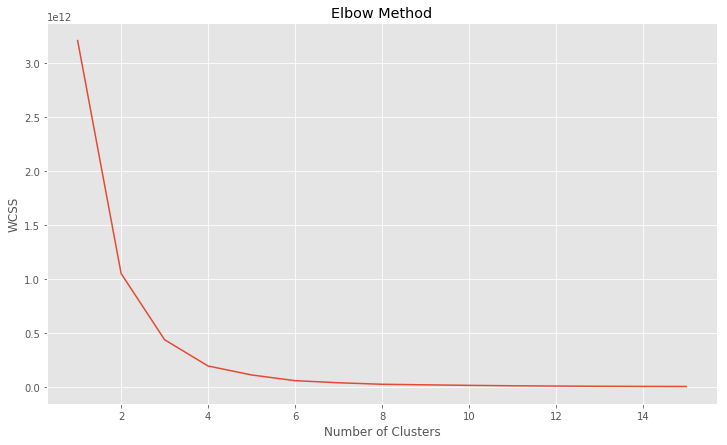

In [5]:
#  Slice two columns, pickup_lan and pickup_lon, of data and convert them into a list respectively applying .values
X=data.iloc[:, [0,1,2]].values  
# print(X)

#  Find the optimal number of clusters (totoal no. of clusters = 15)
wcss = []    # wcss: Within Clusters Sum of Squares'
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ = float: Sum of squared distances of samples to their closest cluster center.
     
plot.plot(range(1,16), wcss)   # x-axis: range(1,11), y-axis: wcss
plot.title("Elbow Method")
plot.xlabel('Number of Clusters')
plot.ylabel('WCSS')
plot.show()

### Use k = 4 for K-Means clustering 

In [8]:

import sklearn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

X = data.iloc[:, 0:3].values  # pickup_lat, pickup_lon, count_pickup_loc
y_class = data.iloc[:, [3]].values  # four classes
print(X)
# print(y_class)

# sklearn.cluster.KMeans: precompute_distances : {‘auto’, True, False} => repeated calculate 'Euclidean Distance' from each point to an aribitrary vector
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter=1000, n_init = 100, random_state=0)   # If None, the random number generator is the RandomState instance used by np.random.
y_kmeans = kmeans.fit_predict(X) # Compute cluster centers and predict cluster index for each sample.kK

[[      8     220       2]
 [     20     378       2]
 [     66     405       2]
 ...
 [    346     599  555344]
 [    605     744  628970]
 [     18     610 1097844]]


### Plotting 3D Model Outputs

In [9]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# py.sign_in('jmcd', 'uQQnXI4uR6ZLhnDLXvhu')

plotly.tools.set_credentials_file(username='kalbee', api_key='yPmNTGSvOrY1KrVfP0tA')

def traceSet(x, y, z, c, label, s=2):
    trace_points = go.Scatter3d(x=x, y=y, z=z, mode='markers', 
                                marker=dict(size=s, line=dict(color='rgb(0, 0, 0)', width=0.5), color=c, opacity=1),name=label)
#     print("trace_points: ", trace_points)
    return trace_points;

def displayChart(title, x_colname, x_range, y_colname, y_range, z_colname, z_range, traces):
    layout = go.Layout(title=title, 
#                        font=dict(family='Droid Serif', size=18, color='lightgrey'),
                       xaxis=dict( 
                                    title='Latitude',
                                    titlefont=dict(
                                        family='Droid Serif',
                                        size=16,
                                        color='lightgrey'
                                    ),
                                    showticklabels=True,
                                    tickangle=45,
                                    tickfont=dict(
                                        family='Droid Serif',
                                        size=12,
                                        color='black'
                                    )),
                        yaxis=dict(
                                    title='Longitude',
                                    titlefont=dict(
                                        family='Droid Serif',
                                        size=16,
                                        color='lightgrey'
                                    ),
                                    showticklabels=True,
                                    tickangle=45,
                                    tickfont=dict(
                                        family='Droid Serif',
                                        size=12,
                                        color='black'

                                    )),
                       scene = dict(xaxis=dict(title=x_colname, range = x_range),
                                    yaxis=dict(title=y_colname, range = y_range),
                                    zaxis=dict(title=z_colname, range = z_range)))
        
    fig = go.Figure(data=traces, layout=layout)
    plotly.offline.plot(fig)

#visualising the clusters
Centroid = kmeans.cluster_centers_
# print(Centroid)
centroids = traceSet(Centroid[:, 0], Centroid[:, 1], Centroid[:, 2], s= 8, c = 'yellow', label='Centroids')
t1 = traceSet(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s= 3, c='red', label = 'C1') #match with red=1 initial class
t2 = traceSet(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s= 3, c='blue', label = 'C2') #match with blue=3 initial class
t3 = traceSet(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s= 3, c='#84F044', label = 'C3') #match with #84F044=2 initial class
t4 = traceSet(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s= 3, c='green', label = 'C4') #match with green=0 initial class
# t5 = traceSet(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s= 3, c='pink', label = 'C5') #match with green=0 initial class
# t6 = traceSet(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s= 3, c='black', label = 'C5') #match with green=0 initial class
x=X[:,0]   # column 0: pickup_lan
y=X[:,1]   # column 1: pickup_lon
z=X[:,2]   # column 2: count_pickup_loc

# print("x", x)
# print("y", y)
# print("z", z)

# print("min max x", [min(x),max(x)])
# print("min max y", [min(y),max(y)])
# print("min max z", [min(z)-1,max(z)])
    
displayChart("Frequency by Pickup Location", "Latitude", [min(x),max(x)], 
          "Longitude", [min(y),max(y)], "Frequency", [[min(z)-1,max(z)]], [t1,t2,t3,t4,centroids])

### Display the Centroids for cluster 1, cluster 2, cluster 3, cluster 4

In [198]:
print('Centroids: ', Centroid)

Centroids:  [[2.71053731e+02 5.43838806e+02 4.41192836e+03]
 [3.04000000e+02 5.49428571e+02 3.64147143e+05]
 [2.40166667e+02 5.15722222e+02 1.63345889e+05]]
